In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter

In [3]:
df = pd.read_csv("Netflix Dataset 1.csv")

In [4]:
df.head()

Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

                                                Type  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         Description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB
None


In [6]:
print(df.describe())

       Show_Id Category              Title                Director  \
count     7789     7789               7789                    5401   
unique    7787        2               7787                    4050   
top      s6621    Movie  The Lost Okoroshi  Raúl Campos, Jan Suter   
freq         2     5379                  2                      18   

                      Cast        Country     Release_Date Rating  Duration  \
count                 7071           7282             7779   7782      7789   
unique                6831            681             1565     14       216   
top     David Attenborough  United States  January 1, 2020  TV-MA  1 Season   
freq                    18           2556              118   2865      1608   

                 Type                                        Description  
count            7789                                               7789  
unique            492                                               7769  
top     Documentaries  Multi

In [7]:
print(df.isnull().sum())

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


In [10]:
print(df.columns)


Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')


In [14]:
print(df.columns.tolist())


['show_id', 'category', 'title', 'director', 'cast', 'country', 'release_date', 'rating', 'duration', 'type', 'description']


In [12]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns)


Index(['show_id', 'category', 'title', 'director', 'cast', 'country',
       'release_date', 'rating', 'duration', 'type', 'description'],
      dtype='object')


In [18]:


# Try to detect a date-like column
possible_cols = [col for col in df.columns if 'date' in col.lower()]
print("Possible date columns:", possible_cols)

# If one is found, use it automatically
if possible_cols:
    date_col = possible_cols[0]
    df['date_converted'] = pd.to_datetime(df[date_col], errors='coerce')
    df['year_added'] = df['date_converted'].dt.year
    df['month_added'] = df['date_converted'].dt.month
else:
    df['year_added'] = df['release_year'] if 'release_year' in df.columns else None
    df['month_added'] = None


Possible date columns: ['release_date']


In [38]:
print(df['type'].unique()[:30])
print("Total unique values:", df['type'].nunique())


['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'
 'Dramas, International Movies' 'Horror Movies, International Movies'
 'Action & Adventure, Independent Movies, Sci-Fi & Fantasy' 'Dramas'
 'International TV Shows, TV Dramas, TV Mysteries'
 'Horror Movies, International Movies, Thrillers' 'Dramas, Thrillers'
 'Crime TV Shows, International TV Shows, TV Dramas'
 'Crime TV Shows, Docuseries, International TV Shows'
 'Documentaries, International Movies, Sports Movies'
 'Independent Movies, Sci-Fi & Fantasy, Thrillers'
 'Dramas, International Movies, Thrillers'
 'International TV Shows, TV Dramas'
 'Comedies, Dramas, Independent Movies' 'Sports Movies'
 'Dramas, Independent Movies, International Movies'
 'Action & Adventure, Dramas, International Movies'
 'Anime Series, International TV Shows' 'Documentaries' 'Reality TV'
 'Documentaries, International Movies' 'TV Comedies'
 'Dramas, International Movies, Romantic Movies' 'Comedies'
 'Comedies, Romantic Movies' 'Documentaries, Spo

Index(['Dramas, Independent Movies, Thrillers', 'Stand-Up Comedy & Talk Shows',
       'Dramas, International Movies', 'Horror Movies',
       'Cult Movies, Horror Movies',
       'Children & Family Movies, Dramas, Faith & Spirituality', 'Dramas',
       'Dramas, Sports Movies', 'Dramas, Thrillers',
       'Children & Family Movies, Comedies',
       ...
       'TV Action & Adventure, TV Dramas, Teen TV Shows',
       'TV Action & Adventure, TV Mysteries, TV Sci-Fi & Fantasy',
       'TV Comedies, TV Dramas, TV Sci-Fi & Fantasy',
       'TV Dramas, TV Sci-Fi & Fantasy',
       'TV Dramas, TV Sci-Fi & Fantasy, TV Thrillers',
       'TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows',
       'Anime Series, International TV Shows, Spanish-Language TV Shows',
       'Comedies, Romantic Movies, Sports Movies',
       'Kids' TV, TV Comedies, TV Sci-Fi & Fantasy',
       'TV Action & Adventure, TV Comedies, TV Sci-Fi & Fantasy'],
      dtype='object', name='type', length=487)


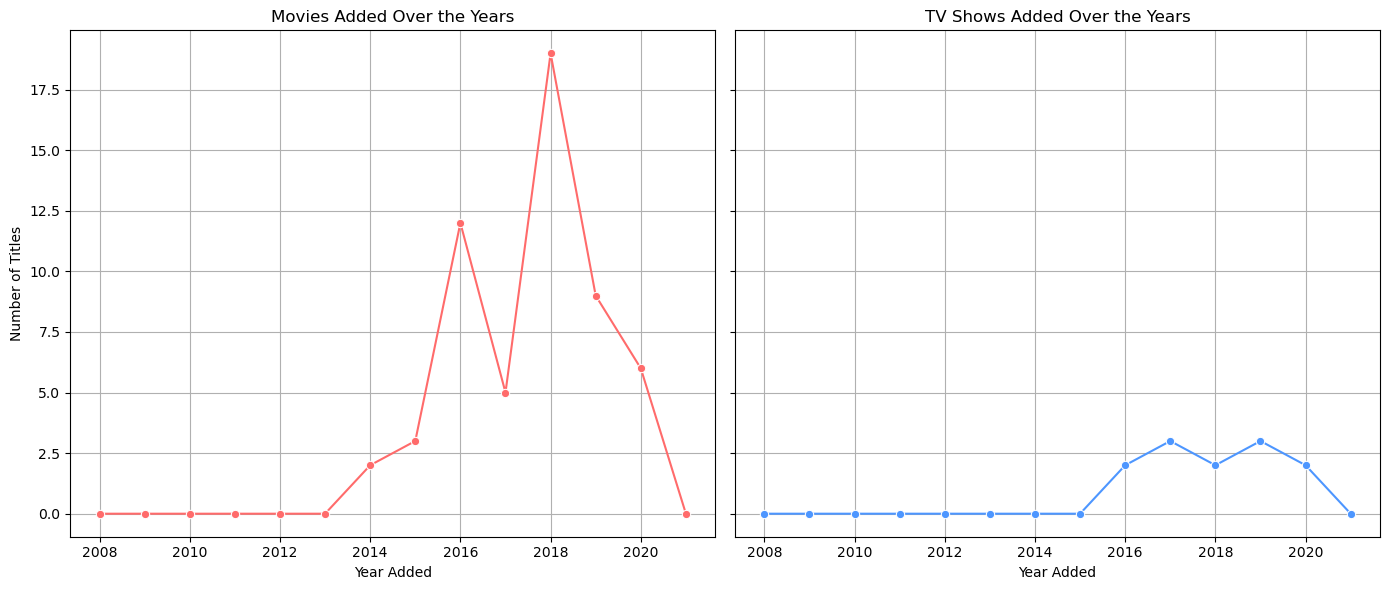

In [63]:
# Group by year_added and type
trend = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)
print(trend.columns)  

# Plot them side-by-side for comparison
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)

# Safely handle available column names
if 'Movie' in trend.columns:
    sns.lineplot(x=trend.index, y=trend['Movie'], marker='o', color='#FF6B6B', ax=axes[0])
    axes[0].set_title("Movies Added Over the Years")
else:
    sns.lineplot(x=trend.index, y=trend['Movies'], marker='o', color='#FF6B6B', ax=axes[0])
    axes[0].set_title("Movies Added Over the Years")

axes[0].set_xlabel("Year Added")
axes[0].set_ylabel("Number of Titles")
axes[0].grid(True)

if 'TV Show' in trend.columns:
    sns.lineplot(x=trend.index, y=trend['TV Show'], marker='o', color='#4D96FF', ax=axes[1])
    axes[1].set_title("TV Shows Added Over the Years")
else:
    sns.lineplot(x=trend.index, y=trend['TV Shows'], marker='o', color='#4D96FF', ax=axes[1])
    axes[1].set_title("TV Shows Added Over the Years")

axes[1].set_xlabel("Year Added")
axes[1].grid(True)

plt.tight_layout()
plt.show()


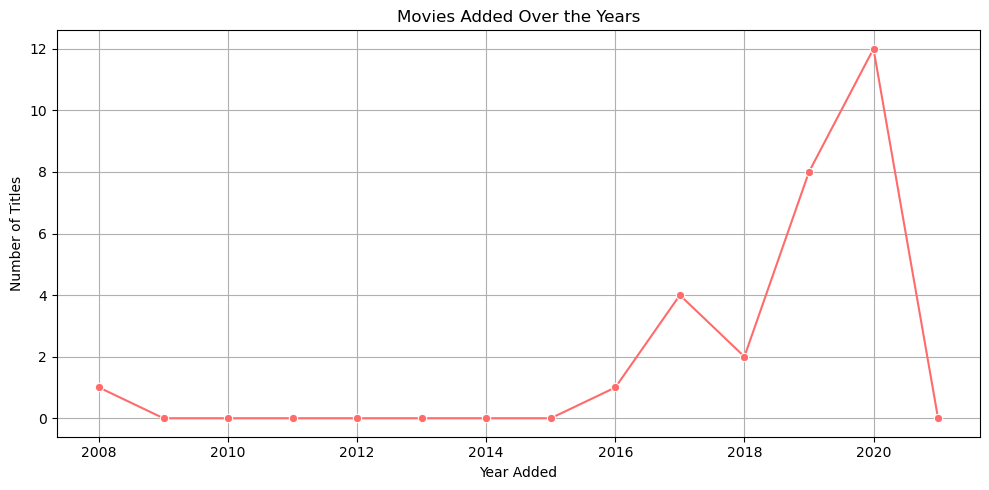

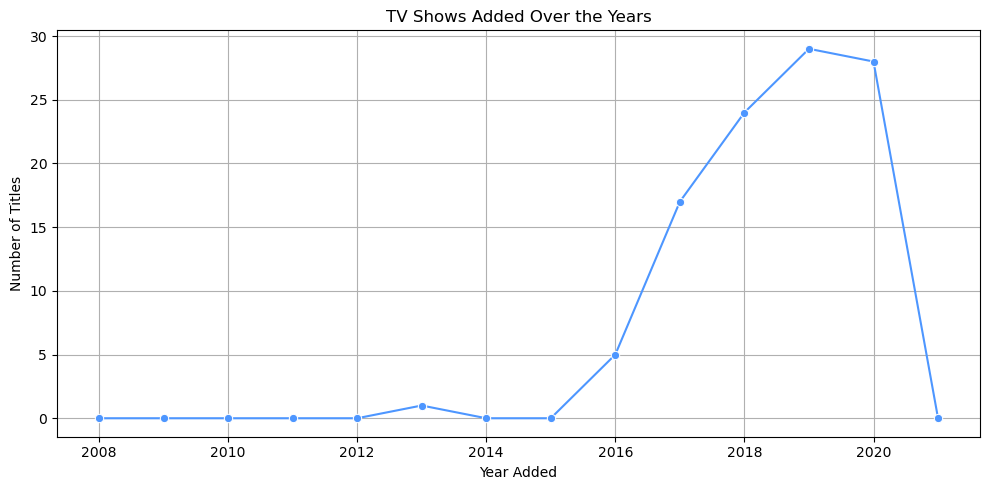

In [62]:
# Movies
plt.figure(figsize=(10,5))
sns.lineplot(x=trend.index, y=trend.filter(like='Movie').iloc[:,0], marker='o', color='#FF6B6B')
plt.title("Movies Added Over the Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.tight_layout()
plt.show()

# TV Shows
plt.figure(figsize=(10,5))
sns.lineplot(x=trend.index, y=trend.filter(like='TV').iloc[:,0], marker='o', color='#4D96FF')
plt.title("TV Shows Added Over the Years")
plt.xlabel("Year Added")+
plt.ylabel("Number of Titles")
plt.grid(True)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Movies vs TV Shows on Netflix')

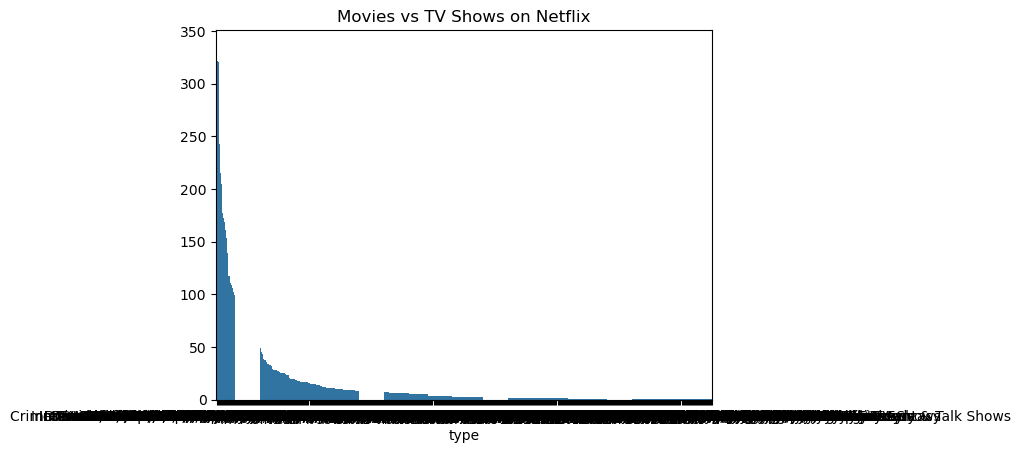

In [22]:
type_counts = df['type'].value_counts()
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title("Movies vs TV Shows on Netflix")

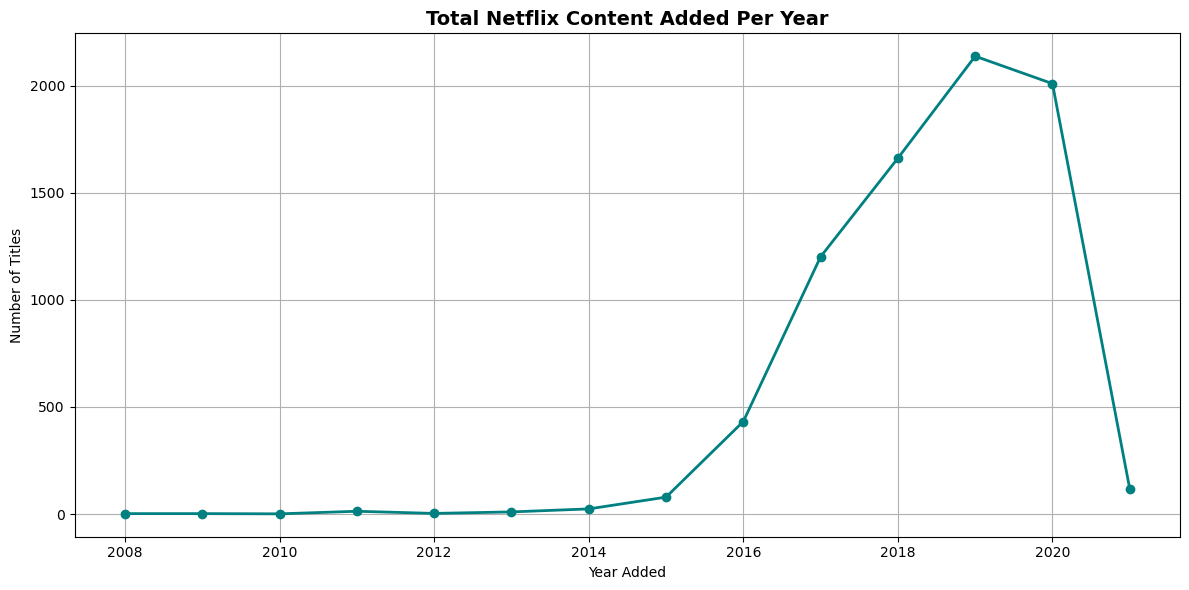

In [49]:
# 1️⃣ Year-wise trend
year_trend = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.plot(year_trend.index, year_trend.values, marker='o', linewidth=2, color='teal')
plt.title("Total Netflix Content Added Per Year", fontsize=14, fontweight='bold')
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.tight_layout()
plt.show()


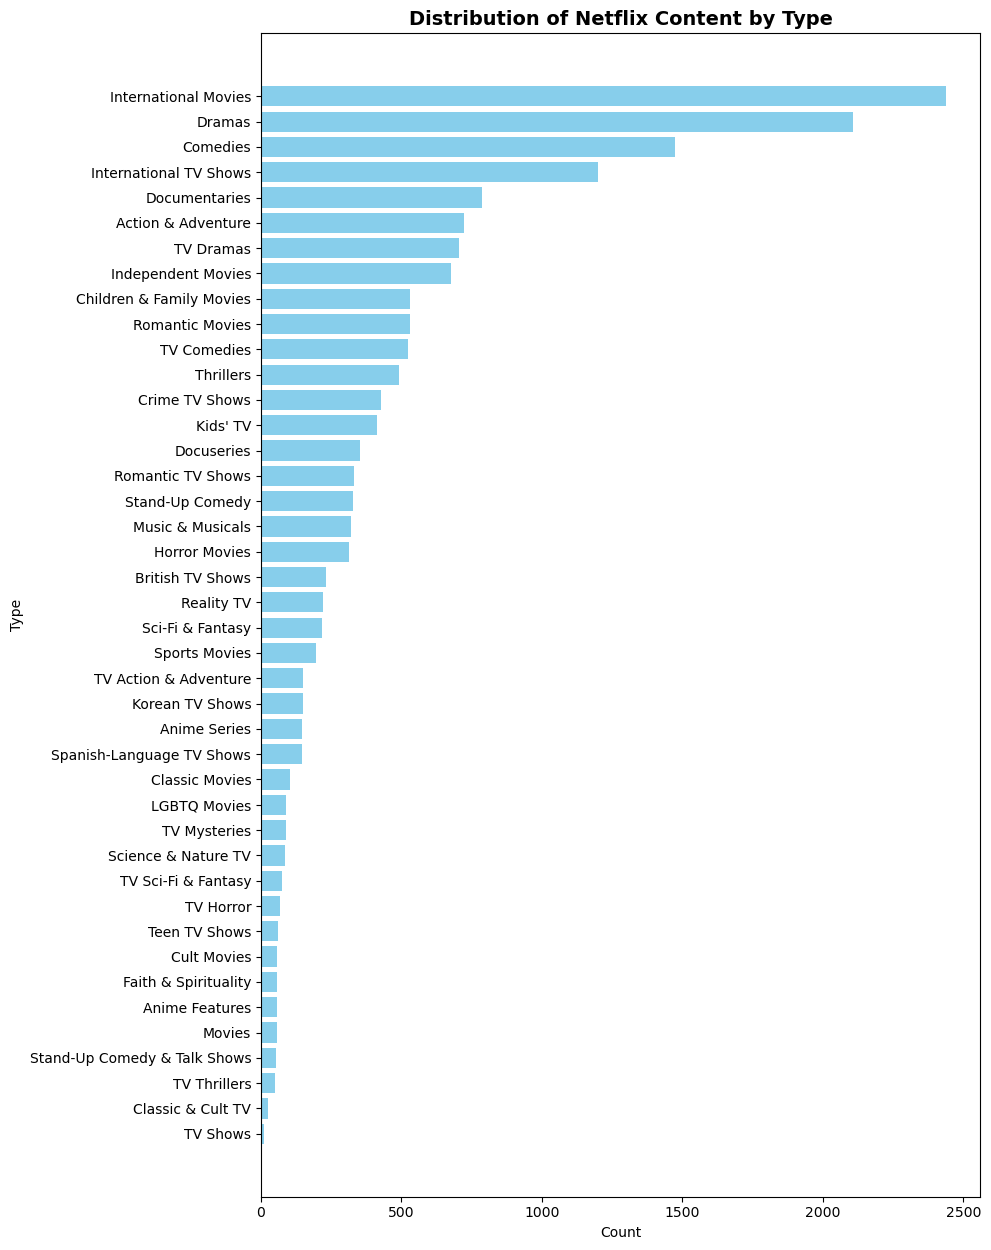

In [53]:


# Split comma-separated values and flatten the list
all_types = df['type'].dropna().str.split(',').sum()
# Strip whitespace from each type
all_types = [t.strip() for t in all_types]

# Count frequency of each type
type_count = Counter(all_types)

# Convert to DataFrame for plotting
type_count_df = pd.DataFrame(type_count.items(), columns=['Type', 'Count'])
type_count_df = type_count_df.sort_values(by='Count', ascending=True)  # ascending for horizontal bar chart

# Plot
plt.figure(figsize=(10, max(6, len(type_count_df) * 0.3)))  # Dynamic height based on number of types
plt.barh(type_count_df['Type'], type_count_df['Count'], color='skyblue')

plt.title("Distribution of Netflix Content by Type", fontsize=14, fontweight='bold')
plt.xlabel("Count")
plt.ylabel("Type")
plt.tight_layout()
plt.show()


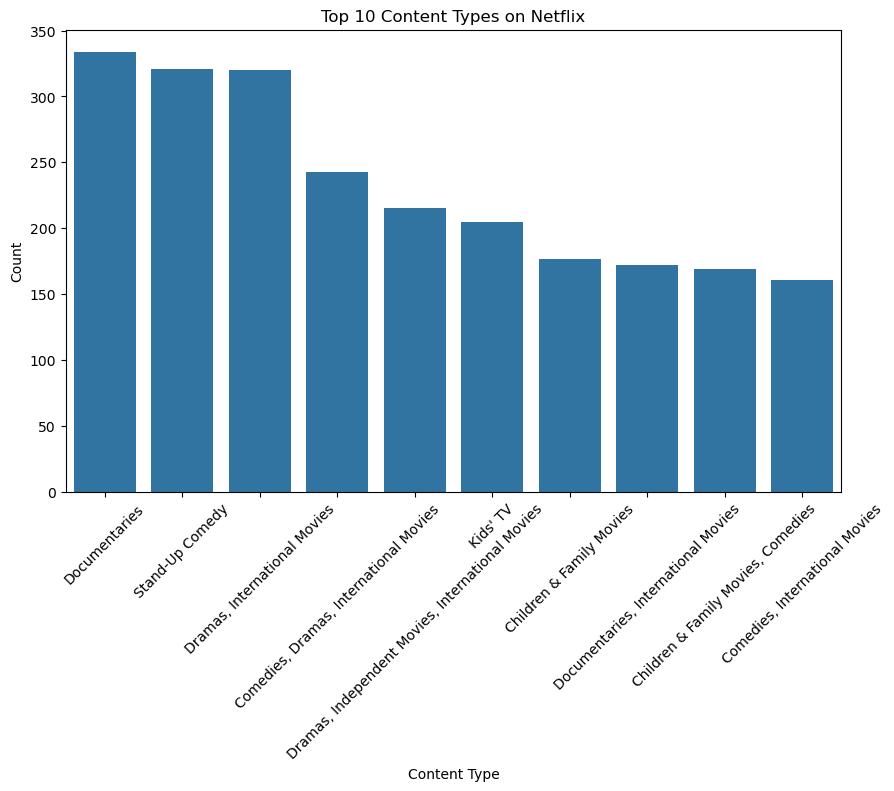

In [32]:
type_counts = df['type'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title("Top 10 Content Types on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


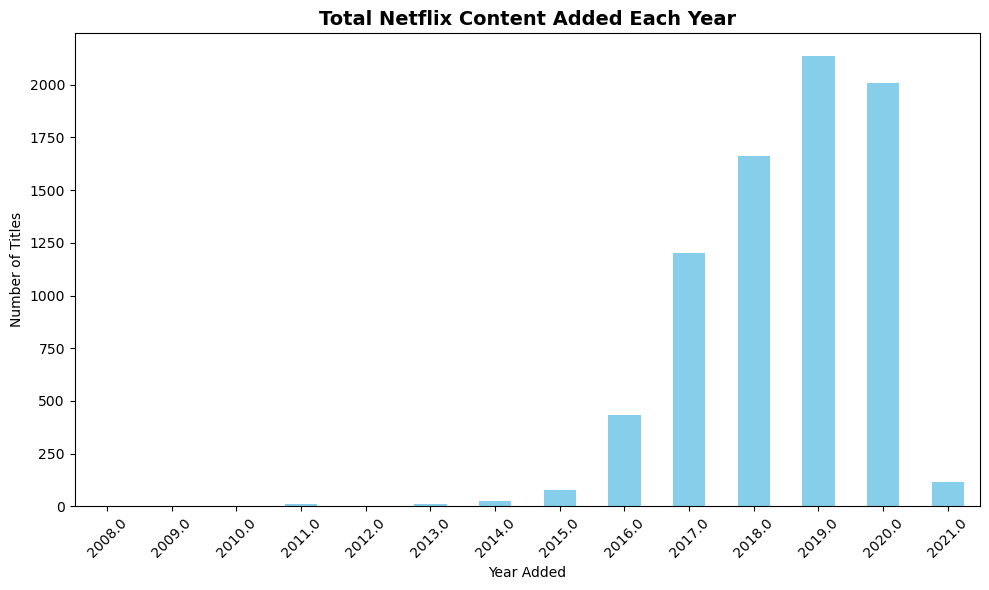

In [44]:


# Count total titles added per year
year_trend = df['year_added'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,6))
year_trend.plot(kind='bar', color='skyblue')
plt.title("Total Netflix Content Added Each Year", fontsize=14, fontweight='bold')
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


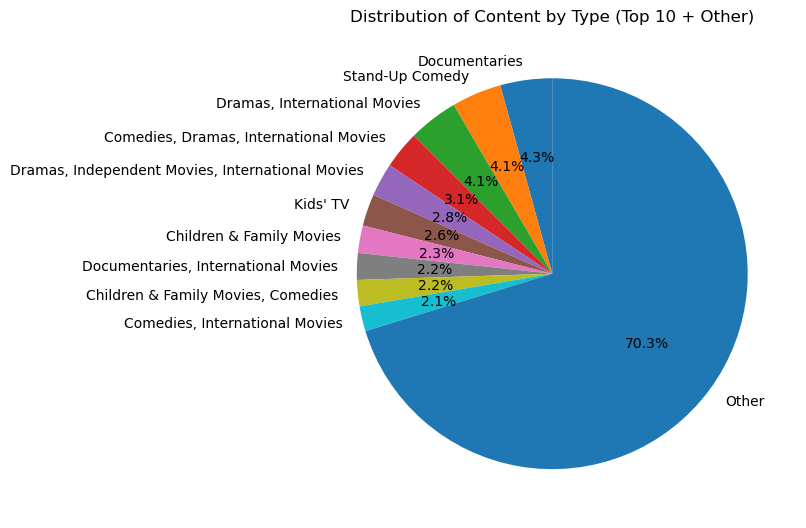

In [47]:


# count values
type_count = df['type'].value_counts()

# choose top N
N = 10
top = type_count.nlargest(N)
other = type_count.iloc[N:].sum()
top['Other'] = other

# plot pie
plt.figure(figsize=(8,8))
top.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title(f"Distribution of Content by Type (Top {N} + Other)")
plt.ylabel('')
plt.tight_layout()      # ok for smaller legend
plt.show()


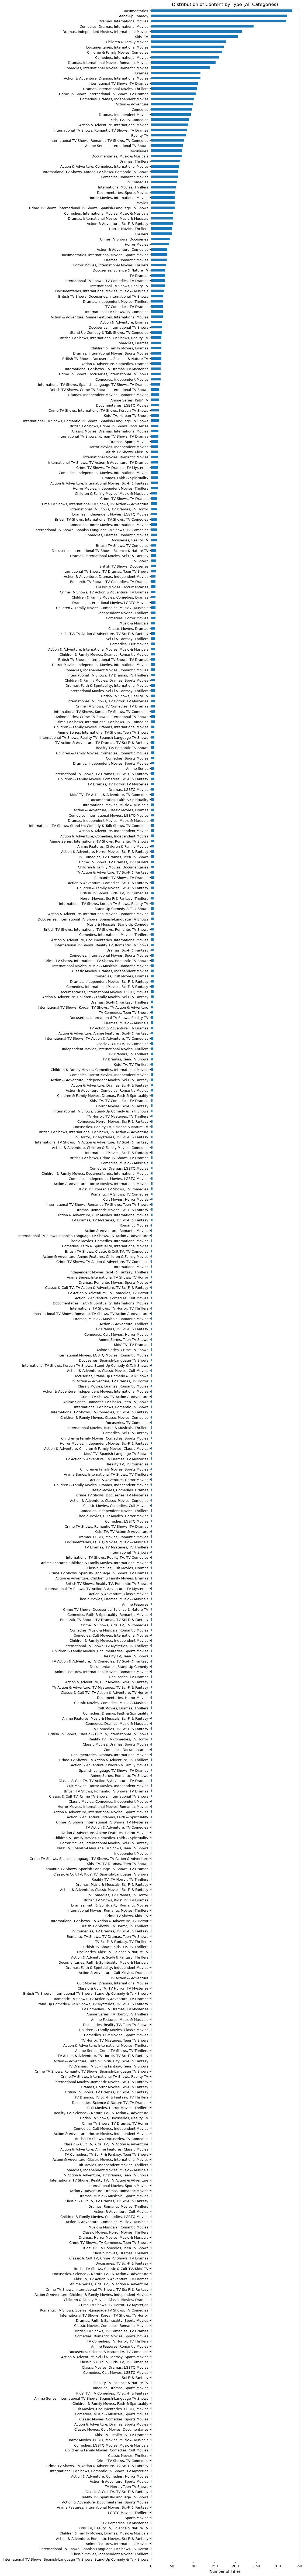

In [46]:
plt.figure(figsize=(10, max(6, 0.25*len(type_count))))  # height scales with number of categories
type_count.sort_values().plot(kind='barh')
plt.title("Distribution of Content by Type (All Categories)")
plt.xlabel("Number of Titles")
plt.ylabel("")
plt.gca().tick_params(axis='y', labelsize=9)
plt.subplots_adjust(left=0.35)   # make room for long y-labels
plt.show()


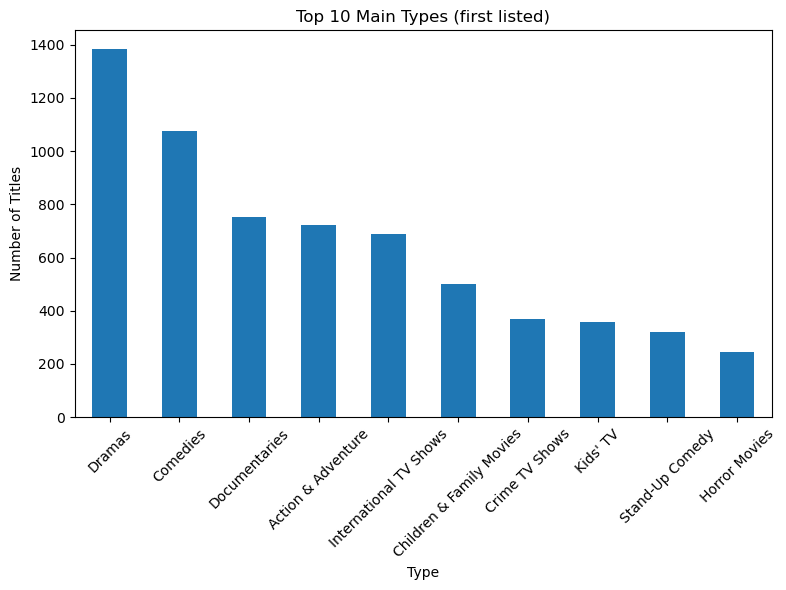

In [48]:
# If type looks like "Dramas, Independent Movies, Thrillers"
df['main_type'] = df['type'].astype(str).apply(lambda x: x.split(',')[0].strip())

main_counts = df['main_type'].value_counts()

# plot top 10 of those
plt.figure(figsize=(8,6))
main_counts.nlargest(10).plot(kind='bar')
plt.title("Top 10 Main Types (first listed)")
plt.xlabel("Type")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [33]:
print(df['type'].unique())


['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'
 'Dramas, International Movies' 'Horror Movies, International Movies'
 'Action & Adventure, Independent Movies, Sci-Fi & Fantasy' 'Dramas'
 'International TV Shows, TV Dramas, TV Mysteries'
 'Horror Movies, International Movies, Thrillers' 'Dramas, Thrillers'
 'Crime TV Shows, International TV Shows, TV Dramas'
 'Crime TV Shows, Docuseries, International TV Shows'
 'Documentaries, International Movies, Sports Movies'
 'Independent Movies, Sci-Fi & Fantasy, Thrillers'
 'Dramas, International Movies, Thrillers'
 'International TV Shows, TV Dramas'
 'Comedies, Dramas, Independent Movies' 'Sports Movies'
 'Dramas, Independent Movies, International Movies'
 'Action & Adventure, Dramas, International Movies'
 'Anime Series, International TV Shows' 'Documentaries' 'Reality TV'
 'Documentaries, International Movies' 'TV Comedies'
 'Dramas, International Movies, Romantic Movies' 'Comedies'
 'Comedies, Romantic Movies' 'Documentaries, Spo

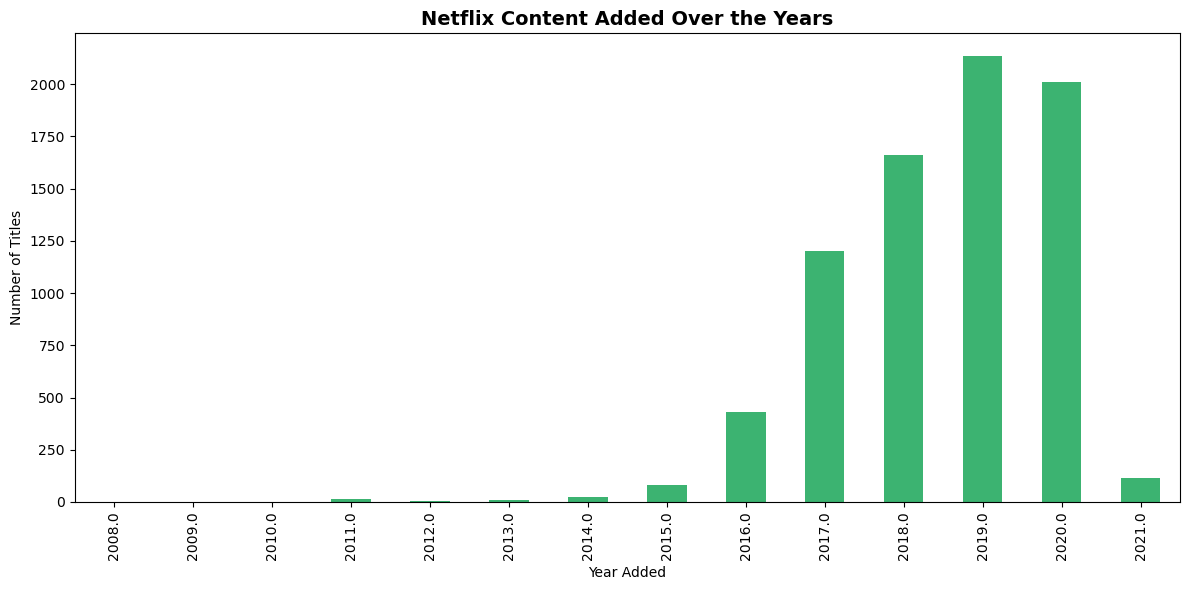

In [54]:
# Grouping by year_added only
year_trend = df['year_added'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
year_trend.plot(kind='bar', color='mediumseagreen')
plt.title("Netflix Content Added Over the Years", fontsize=14, fontweight='bold')
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.tight_layout()
plt.show()


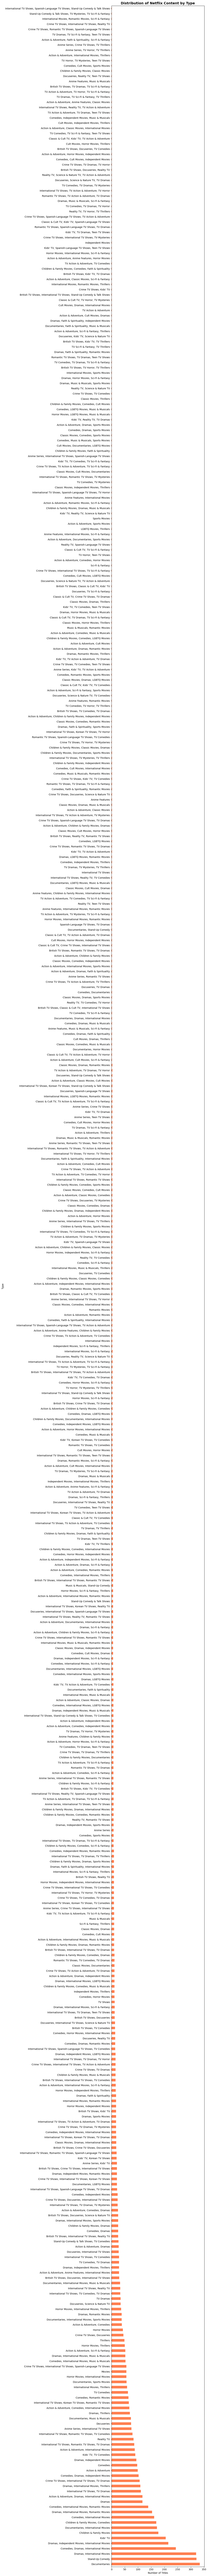

In [56]:
# Grouping by type only
type_trend = df['type'].value_counts()

# Plot as horizontal bar chart
plt.figure(figsize=(12, max(6, len(type_trend) * 0.3)))  # Adjust height dynamically
type_trend.plot(kind='barh', color='coral')

plt.title("Distribution of Netflix Content by Type", fontsize=14, fontweight='bold')
plt.xlabel("Number of Titles")
plt.ylabel("Type")
plt.tight_layout()
plt.show()


In [36]:
df.rename(columns={'YourColumnName': 'type'}, inplace=True)


In [37]:
print(df.columns.tolist())
print(df['type'].unique()[:20])


['show_id', 'category', 'title', 'director', 'cast', 'country', 'release_date', 'rating', 'duration', 'type', 'description', 'date_converted', 'year_added', 'month_added']
['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'
 'Dramas, International Movies' 'Horror Movies, International Movies'
 'Action & Adventure, Independent Movies, Sci-Fi & Fantasy' 'Dramas'
 'International TV Shows, TV Dramas, TV Mysteries'
 'Horror Movies, International Movies, Thrillers' 'Dramas, Thrillers'
 'Crime TV Shows, International TV Shows, TV Dramas'
 'Crime TV Shows, Docuseries, International TV Shows'
 'Documentaries, International Movies, Sports Movies'
 'Independent Movies, Sci-Fi & Fantasy, Thrillers'
 'Dramas, International Movies, Thrillers'
 'International TV Shows, TV Dramas'
 'Comedies, Dramas, Independent Movies' 'Sports Movies'
 'Dramas, Independent Movies, International Movies'
 'Action & Adventure, Dramas, International Movies'
 'Anime Series, International TV Shows' 'Documentaries']


Using column: category


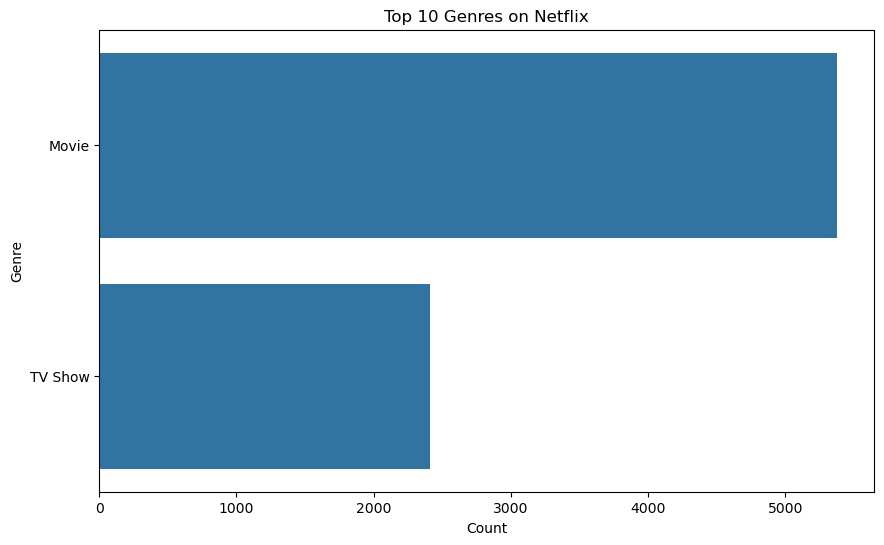

In [30]:
possible_cols = [col for col in df.columns if 'genre' in col.lower() or 'listed' in col.lower() or 'category' in col.lower()]

if possible_cols:
    genre_col = possible_cols[0]   # pick the first match
    print(f"Using column: {genre_col}")
    
    df[genre_col] = df[genre_col].astype(str)
    genres = Counter([g.strip() for s in df[genre_col].dropna() for g in s.split(',')])
    
    top_genres = pd.DataFrame(genres.most_common(10), columns=['Genre', 'Count'])
    plt.figure(figsize=(10,6))
    sns.barplot(x='Count', y='Genre', data=top_genres)
    plt.title("Top 10 Genres on Netflix")
    plt.show()

else:
    print("No genre-like column found! Check df.columns to identify the correct one.")


Text(0.5, 1.0, 'Top 10 Countries Contributing to Netflix Content')

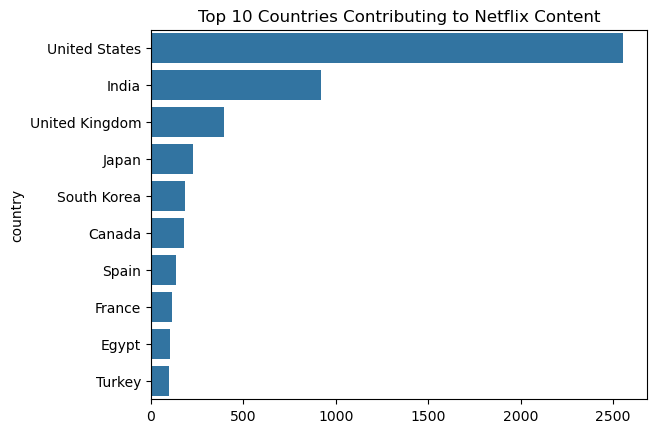

In [31]:
country_count = df['country'].value_counts().head(10)
sns.barplot(x=country_count.values, y=country_count.index)
plt.title("Top 10 Countries Contributing to Netflix Content")